# 4. Spheres as manifolds

This notebook is part of the [Introduction to manifolds in SageMath](https://sagemanifolds.obspm.fr/intro_to_manifolds.html) by Andrzej Chrzeszczyk (Jan Kochanowski University of Kielce, Poland).

In [1]:
version()

'SageMath version 9.6, Release Date: 2022-05-15'

## One dimensional sphere $\mathbf{S}^1$

<br>

**Example 4.1**

In `manifolds.Sphere` in the one-dimensional  case 
$\ \  S^1=\{(x,y)\in R^2: x^2+y^2=1\}\ \ $ the default coordinates are the spherical (polar) ones.

In [2]:
%display latex
S1=manifolds.Sphere(1)                      # 1-dimensional sphere
Phi=S1.embedding()                          # embedding S^1 -> E^2
Phi.disp()                                  # show embedding

iota: S^1 → E^2
on A: phi ↦ (x, y) = (cos(phi), sin(phi))

The spherical coordinates are predefined in `manifolds.Sphere` but we want to have a shorter name.

In [3]:
sph.<phi>=S1.spherical_coordinates()       # spherical coordinates
sph.coord_range()                          # coordinate range

phi: [-pi, pi] (periodic)

On $\ [-\pi,\pi]\ $ the map $\varphi \to (\cos\varphi, \sin\varphi) $ is not one-to one, so not homeomorphic.

To represent  graphically  the sphere $S^1$ we need the ambient space $R^2$ and the mapping
$S^1 \to R^2$.

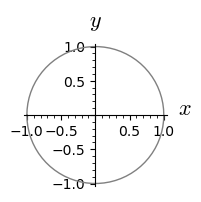

In [4]:
E=S1.ambient()                            # ambient space E^2
c_cart.<x,y> = E.cartesian_coordinates()  # Cartesian coord in R^2
p=sph.plot(c_cart,mapping=Phi,number_values=15,
    thickness=1,color='grey')             # plot S^1
p.show(figsize=[3,2])                     # show plot

Restrictng the coordinate to an open interval contained in $[-\pi,\pi]$ we obtain a homeomorphic map (but the image is a proper subset of the sphere).

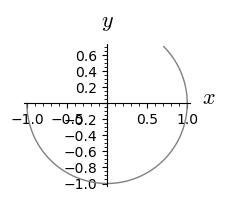

In [5]:
p=sph.plot(c_cart,mapping=Phi,ranges={phi:(-pi,pi/4)},
  number_values={phi:50},color={phi:'grey'})  # plot subset of S^1
p.show(figsize=[3,2])                         # show plot

<br>

**Example 4.2**

$S^1$ can be defined as a manifold with **two-element atlas**. Note that in this new example we do not use the `manifolds.Sphere` command!

In [6]:
# example from the Manifolds manual, sect 2.7.1 (p.546 in 9.5 version)
M = Manifold(1, 'S^1')          # manifold S^1
U = M.open_subset('U')          # the complement of one point (1,0)
c_u.<u> = U.chart('u:(0,2*pi)') # the standard angle coordinate
V = M.open_subset('V')          # the complement of the point (-1,0)
c_v.<v> = V.chart('v:(0,2*pi)') # the angle u-pi
M.declare_union(U,V)            # S^1 is the union of U and V
M.atlas()                       # atlas

[Chart (U, (u,)), Chart (V, (v,))]

On the intersection of $W=U\cap V$ two "new" charts are defined, they are just restrictions of the "old" maps to $W$.

In [7]:
u_to_v = c_u.transition_map(c_v, (u-pi,), # transition map u->v
    intersection_name='W',
    restrictions1 = u!=0, 
    restrictions2 = v!=pi)
v_to_u = u_to_v.inverse()                 # inverse transition
M.atlas()                                 # atlas

[Chart (U, (u,)), Chart (V, (v,)), Chart (W, (u,)), Chart (W, (v,))]

If we need to use $W=U\cap V$ in calculations we can define it:

In [8]:
W = U.intersection(V)                    # intersection of
print(W)                                 # chart domains

Open subset W of the 1-dimensional differentiable manifold S^1


To make the plot in $R^2$ we need to define an ambient space and the embedding.

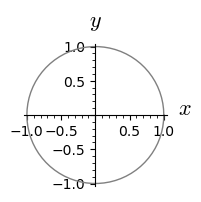

In [9]:
R2 = Manifold(2, 'R^2')                 # manifold R^2
X.<x,y> = R2.chart()                    # Cartesian coordinates
# the embedding is not predefined this time, so it must be
                                        # defined:
F = M.continuous_map(R2, {(c_u, X): [cos(u),sin(u)]}, name='F')
p=c_u.plot(X,mapping=F,color='grey')    # plot image of S^1
p.show(figsize=(3,2))                   # show plot

<br>

### Stereographic coordinates on $\mathbf{S}^1$

<br>

**Example 4.3**

In `manifold.Sphere` not only the Cartesian and polar  but also the stereographic coordinates are predefined.

In [10]:
S1=manifolds.Sphere(1)         # stereographic projection from the
S1.stereographic_coordinates(pole='north',names='u')  # North pole

Chart (S^1-{NP}, (u,))

In [11]:
                               # stereographic projection from the
S1.stereographic_coordinates(pole='south',names='u')  # South pole

Chart (S^1-{SP}, (up,))

<br>

### Stereographic projection of $S^1$ from the North pole $N = (0, 1)$

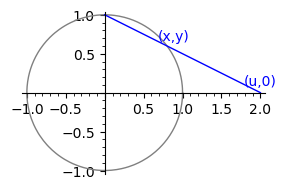

In [12]:
var('t')                                        # symb. variable
p1=parametric_plot((cos(t),sin(t)),(t,0,2*pi),color='grey')  
                                                # plot the circle
p2=plot(1-x/2,(x,0,2))          # half line through (0,1) and (x,y)
p3= text("(x,y)",(0.88,0.72))                   # point (x,y)
p4= text("(u,0)",(2.0,0.15))                    # point (u,0)
(p1+p2+p3+p4).show(figsize=[3,2])               # combine plots

Consider the line which passes through the North pole $(0, 1)$, the point $(x, y)$ on the circle and intersects
the axis Ox at the point $(u, 0)$. The function $u = u(x, y)$ defines the
stereographic projection. Three points: North pole, the
point $(x, y)$ on the circle and the point $(u, 0)$ are on the same line.
Since the right triangle with the hypotenuse joining (0,1), (x,y) and the right triangle with the hypotenuse joining (0,1),(u,0) are similar, we have $\frac{u}{x}=\frac{1}{1-y}$ and consequently $u=\frac{x}{1-y}$.
Solving the system of equations
$$ x^2+y^2=1,\quad u=\frac{x}{1-y},$$ with respect to $(x,y)$: 

In [13]:
%display latex
forget()                               # forget previous assumptions
var('x, y, u')                               # symbolic variables
assume(y>0)                                  # assume y>0
s=solve([x^2+y^2==1,u==x/(1-y)],[x,y]);s     # solve eq. above

[[x == 2*u/(u^2 + 1), y == (u^2 - 1)/(u^2 + 1)], [x == 0, y == 1]]

we obtain the relations
$$ x=\frac{2u}{u^2+1},\quad y=\frac{u^2-1}{u^2+1}, \quad u=\frac{x}{1-y}.$$

<br>

Now consider the South pole case.

###  Stereographic projection of $S^1$ from the South pole $S = (0, -1)$

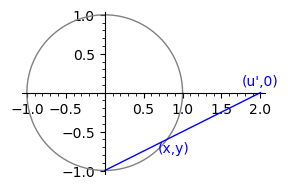

In [14]:
var('t')                                       # symbolic variable
p1=parametric_plot((cos(t),sin(t)),(t,0,2*pi),color='grey') 
                                               # plot the circle
p2=plot(x/2-1,(x,0,2))          # halfline through (0,-1) and (x,y)
p3= text("(x,y)",(0.88,-0.72))                 # point (x,y)
p4= text("(u',0)",(2.0,0.15))                  # point (u',0)
(p1+p2+p3+p4).show(figsize=[3,2])              # combine plots


Since the right triangle with the hypotenuse joining (0,-1), (x,y) and the right triangle with the hypotenuse joining (0,-1),(u',0) are similar we have $\frac{u'}{x}=\frac{1}{1-(-y)}$ ($y$ is negative now) and consequently $u'=\frac{x}{1+y}$.
Solving the system of equations
$$ x^2+y^2=1,\quad u'=\frac{x}{1+y},$$ with respect to $(x,y)$: 

In [15]:
forget()                               # forget previous assumptions
var('x, y, up')                               # symbolic variables
assume(y<0)                                   # assume y<0
s=solve([x^2+y^2==1,up==x/(1+y)],[x,y]);s     # solve eq. above

[[x == 2*up/(up^2 + 1), y == -(up^2 - 1)/(up^2 + 1)], [x == 0, y == -1]]

we obtain the relations
$$ x=\frac{2u'}{u'^2+1},\quad y=\frac{1-u'^2}{u'^2+1}, \quad u'=\frac{x}{1+y}.$$

<br>

**Example 4.4**

As we mentioned, both the stereographic projections from North and South poles are predefined in `manifolds.Sphere`.

In [16]:
reset()
S1=manifolds.Sphere(1)                    # S^1 from manifolds.Sphere
                     # stereographic projection from the North pole:
stereoN.<u> = S1.stereographic_coordinates(pole='north')
                     # stereographic projection from the South pole:
stereoS.<up> = S1.stereographic_coordinates(pole='south')

Phi=S1.embedding()                        # embedding S^1 -> E^2
Phi.disp()                                # show embedding

iota: S^1 → E^2
on A: phi ↦ (x, y) = (cos(phi), sin(phi))
on S^1-{NP}: u ↦ (x, y) = (2*u/(u^2 + 1), (u^2 - 1)/(u^2 + 1))
on S^1-{SP}: up ↦ (x, y) = (2*up/(up^2 + 1), -(up^2 - 1)/(up^2 + 1))

<br>

**Example 4.5**

To show graphically how the projection from the North pole acts, let us extract 
an apropriate part of the definition from the previous cell.

In [17]:
# continuation
E=S1.ambient()                                    # ambient space E^2
c_cart.<x,y> = E.cartesian_coordinates()          # Cartesian coord.
fun=list(Phi.coord_functions(stereoN).expr())     # embedd. functions
PhiN = S1.continuous_map(E,{(stereoN, c_cart): fun},
        name='PhiN',latex_name=r'\Phi_N')         # define embedding
PhiN.display()                                    # show embedding

PhiN: S^1 → E^2
on S^1-{NP}: u ↦ (x, y) = (2*u/(u^2 + 1), (u^2 - 1)/(u^2 + 1))

Let us plot the set of points $(x,y)$ corresponding to   $u\in (-10,10)$.

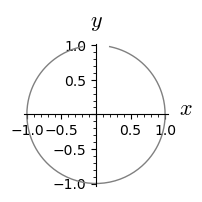

In [18]:
p=stereoN.plot(c_cart,mapping=PhiN,ranges={u:(-10,10)},
  number_values={u:50},color={u:'grey'},
  plot_points=500)                  # image of (-10,10) under PhiN
p.show(figsize=[3,2])               # show the image

Thus the points of the grey arc in the figure are projected onto the interval (-10,10).

<br>

**Example 4.6**

Now let us extract the definition of the projection from the South pole,

In [19]:
# continuation
fun=list(Phi.coord_functions(stereoS).expr())    # embedd. functions
PhiS = S1.continuous_map(E,{(stereoS, c_cart): fun},
    name='PhiS',latex_name=r'\Phi_S')            # define embedding
PhiS.display()                                   # show embedding

PhiS: S^1 → E^2
on S^1-{SP}: up ↦ (x, y) = (2*up/(up^2 + 1), -(up^2 - 1)/(up^2 + 1))

and check which points of the circle are projected onto (-10,10):

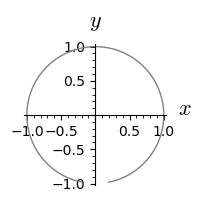

In [20]:
# continuation
p=stereoS.plot(c_cart,mapping=PhiS,ranges={up:(-10,10)},
  number_values={up:50},color={up:'grey'},   # plot image of (-10,10)
  plot_points=500)
p.show(figsize=[3,2])                        # show image

<br>


### Transition map from u coordinate to u' coordinate

Using the relations  $\ u=\frac{x}{1-y},\ \ u'=\frac{x}{1+y}$ and $y=\frac{u^2-1}{u^2+1},\ $ we obtain
$u'=\frac{x}{1+y}=\frac{u(1-y)}{1+y}=\frac{1-y}{1+y}u.\ \ $ Replacing $y$ by $\frac{u^2-1}{u^2+1}\ \ $ we get $\ \frac{1-y}{1+y}=\frac{1-\frac{u^2-1}{u^2+1}}{1+\frac{u^2-1}{u^2+1}}=
\frac{u^2+1-u^2+1}{u^2+1+u^2-1}=\frac{2}{2u^2}=\frac{1}{u^2}.\ $ Accordingly $u'=\frac{1-y}{1+y}u=\frac{1}{u},\ $ so the transition map from $u$ coordinate to $u'$ coordinate has the form $\ u'=\frac{1}{u}.\ $ It is smooth if $\ u\not=0, u'\not=0.$

Here is SageMath solution (eliminate x,y variables from  equations of  the first line in the previous computations):

In [21]:
%display latex
var('x,y,u,up')
maxima.eliminate([u==x/(1-y),up==x/(1+y),   # eliminate var. x,y
    y==(u^2-1)/(u^2+1)],[x,y]).sage()   # from eqs of projections

[2*(u*up - 1)*u]

The answer means that the bracket vanishes.
Since $u\not=0$, the expression in the bracket vanishes if $\ \ u'=\frac{1}{u}$.

<br>

**Example 4.7**

In `SageMath Manifolds` the transition from one coordinate system to the other can be defined as follows:

In [22]:
S1=manifolds.Sphere(1)                    # S^1 from manifolds.Sphere
                     # stereographic projection from the North pole:
stereoN.<u> = S1.stereographic_coordinates(pole='north')
                     # stereographic projection from the South pole:
stereoS.<up> = S1.stereographic_coordinates(pole='south')


trans = stereoN.transition_map(stereoS, 1/u, # define transition
                intersection_name='W',       # stereoN -> StereoS
                restrictions1= u!=0,         # specify
                restrictions2 = up!=0)       # restrictions
trans.display()                              # show transition

up = 1/u

In some cases, the definition of the inverse transition can be left to the `SageMath Manifolds`.

In [23]:
trans.inverse().display()

u = 1/up

As we can see the transition map and its inverse are smooth.

Some transition maps are predefined in `manifolds.Sphere`.<br>

<br>

**Example 4.8**

Let us check that the transitions from the previous example are predefined in `manifolds.Sphere`.

In [24]:
dim=1                                         # dim of the sphere
Sph=manifolds.Sphere(dim)                     # sphere S^1 
spher = Sph.spherical_coordinates()           # spherical coord.
stereoN, stereoS = Sph.coordinate_charts('stereographic',
                     names=['u'])             # sterogr. projections
A=stereoN.domain()                            # domain of stereoN
                 # intersection of domains of stereoN and stereo S:
W = Sph._stereoN_dom.intersection(Sph._stereoS_dom)
                              # transition from stereoN to stereoS:
FNS=Sph.coord_change(stereoN.restrict(W),stereoS.restrict(W))
                              # transition from stereoS to stereoN:
FSN=Sph.coord_change(stereoS.restrict(W),stereoN.restrict(W))
FNS.disp(),FNS.disp()                        # show transitions

(up = 1/u, up = 1/u)

We can check that both transitions can be obtained as compositions of other transitions.

In [25]:
# continuation
A = spher.domain()                         # domain of spher.coord
                 # intersection of domains of stereoN and stereo S:
W = Sph._stereoN_dom.intersection(Sph._stereoS_dom)
V=W.intersection(A)                  # intersection of domains of 
                                     # stereoN, stereoS and spher                                   
F1=Sph.coord_change(spher.restrict(V), 
        stereoN.restrict(V))         # transition spher -> stereoN

F2=Sph.coord_change( stereoN.restrict(V),
        spher.restrict(V))           # transition stereoN -> spher

F3=Sph.coord_change(spher.restrict(V), stereoS.restrict(V))
                                     # transition spher -> stereoS
F4=Sph.coord_change( stereoS.restrict(V),spher.restrict(V))
                                     # transition stereoS -> spher
(F1*F4).disp(),(F3*F2).disp()        # show compositions

(u = 1/up, up = 1/u)

<br>

**Example 4.9**

Knowing the transition maps  we are ready to define  $S^1$ as a manifold with two maps. 

Note that this time, our calculations are independent of `manifolds.Sphere`. 

In [26]:
M = Manifold(1, 'S^1')         # sphere S^1 
U = M.open_subset('U')         # complement of the North pole
cU.<u> = U.chart()             # sterogr. proj. from North pole
V = M.open_subset('V')         # complement of the South pole
cV.<v> = V.chart()             # sterogr. proj. from South pole
M.declare_union(U,V)           # M is  the sum of U and V
trans = cU.transition_map(cV, 1/u, intersection_name='W',
        restrictions1= u!=0,   # transition  cU -> cV
        restrictions2 = v!=0)
trans_inv=trans.inverse()      # inverse transition
trans.disp(),trans_inv.disp()  # show transitions

(v = 1/u, u = 1/v)


<br>

## Two dimensional sphere $S^2$

### Spherical coordinates in $\mathbf{S}^2$

In `manifolds.Sphere` in  two-dimensional case 
$\ \ S^2=\{(x,y,z)\in R^3: x^2+y^2+z^2=1\}\ \ $ the default coordinates are the spherical ones.

In [27]:
var('u v t')                                   # symb.var.

po1={'thickness':5,'color':'darkblue'}         # parameters
po2={'fontsize':20,'color':'black'}
po3={'size':7,'color':'black'}

ax =line3d([(0,0,0), (1+0.15,0,0)], **po1)     # axes
ax+=line3d([(0,0,0), (0,1+0.15,0)], **po1)
ax+=line3d([(0,0,0), (0,0,1+0.15)], **po1)
ax+=text3d("x",(1.25,0,0),**po2)
ax+=text3d("y",(0,1.25,0),**po2)
ax+=text3d("z",(0.,0.,1.25),**po2)

In [28]:
                                              # semisphere:
s=parametric_plot3d((cos(u)*cos(v), sin(u)*cos(v), sin(v)),
(u,0,2*pi), (v,0,pi/2),opacity=0.9,color='lightgrey')

a=0.59                                        # triangle
tr=line3d([(0,0,0),(a,a,0),(a,a,a),(0,0,0)],**po1)

dots=point3d([(0.5*cos(t),0.5*sin(t),0)       # dots
  for t in srange(0,pi/4,0.1)], **po3)
dots+=point3d([(0.5*cos(t),0.5*cos(t),0.5*sin(t))
  for t in srange(pi/4,pi/2,0.1)],**po3)
                                               
t=text3d("(x,y,z)",(0.6,0.8,0.7),**po2)       # variables
t+=text3d("φ",(0.7,0.3,0.0),**po2)            # names
t+=text3d("θ",(0.,0.2,0.5),**po2)
                                              # combine plots:
(ax+s+tr+dots+t).rotateZ(-pi/8).show(frame=False)

Graphics3d Object

**Example 4.10**

Let us show how to use the spherical coordinates in $\ S^2$.

In [29]:
%display latex
S2=manifolds.Sphere(2)  # two-dimensional sphere
Phi=S2.embedding()      # embedding into E^3
Phi.disp()              # show embedding

iota: S^2 → E^3
on A: (theta, phi) ↦ (x, y, z) = (cos(phi)*sin(theta), sin(phi)*sin(theta), cos(theta))

In [30]:
S2.default_chart()      # default chart

Chart (A, (theta, phi))

Let us check the ranges of variables $\theta, \phi$.

In [31]:
sph.<th,ph>=S2.spherical_coordinates()  # spherical coordinates
print(sph.codomain())

The Cartesian product of ((0, pi), [-pi, pi))


Let us note that that the spherical coordinates in `manifolds.Sphere` are defined on an open subset of the sphere, they do not cover the whole sphere. To cover the entire sphere with charts, we will use the stereographic coordinates instead.

In [32]:
A=sph.domain()      # domain of definition of spher. coordinates
print(A)

Open subset A of the 2-sphere S^2 of radius 1 smoothly embedded in the Euclidean space E^3


Check the Jacobian of the embedding into $E^3$,

In [33]:
Phi.jacobian_matrix()           # Jacobian matrix of embedding

[ cos(phi)*cos(theta) -sin(phi)*sin(theta)]
[ cos(theta)*sin(phi)  cos(phi)*sin(theta)]
[         -sin(theta)                    0]

and the 2x2 minors of this matrix.

In [34]:
Phi.jacobian_matrix().minors(2)     # minors of Jacobian

[cos(phi)^2*cos(theta)*sin(theta) + cos(theta)*sin(phi)^2*sin(theta),
 -sin(phi)*sin(theta)^2,
 cos(phi)*sin(theta)^2]

The sum of squares of 2x2 minors allows us to check the rank of the Jacobian matrix.

In [35]:
ll=[Phi.jacobian_matrix().minors(2)[k].full_simplify() 
    for k in range(3)]             # list of minors of Jacobian
sum([ll[k]^2 for k in range(3)]).full_simplify()
                                   # sum of squares of minors

sin(theta)^2

so the rank is 2 if $\theta\in (0,\pi)$.

<br>

If we are not interested in all details, we can check the rank of Jacobian using the command:

In [36]:
Phi.jacobian_matrix().rank()

2

As we can see  spherical coordinates define  transformation with Jacobian of rank 2 on the subset A of the sphere  defined by $(\theta,\varphi)\in (0,\pi)\times [-\pi,\pi)$.

<br>

**Example 4.11**

Let us plot the coordinate lines of the spherical coordinates.

In [37]:
%display latex
S2=manifolds.Sphere(2)                    # two-dimensional sphere
sph.<th,ph>=S2.spherical_coordinates()    # spherical coordinates
Phi=S2.embedding()                        # embedding into E^3
E=S2.ambient()                            # ambient space E^3
c_cart.<x,y,z> = E.cartesian_coordinates()  # Cartesian coordinates
p=sph.plot(c_cart,mapping=Phi,number_values=15,
    thickness=2,color='grey',             # plot coordinate lines
    label_axes=False,frame=False)
p.show(frame=False)                       # show plot

Graphics3d Object

<br>

**Example 4.12**

We can restrict the ranges of parameters (for example to $\ \theta\in (0,\pi/2),\ \ \phi \in (0,\pi/4)$ ):

In [38]:
po1={'thickness':5,'color':'darkblue'}                # param.
po2={'fontsize':20,'color':'black'}
ax =line3d([(0,0,0), (1+0.15,0,0)], **po1)            # axes
ax+=line3d([(0,0,0), (0,1+0.15,0)], **po1)
ax+=line3d([(0,0,0), (0,0,1+0.15)], **po1)
ax+=text3d("x",(1.25,0,0),**po2)
ax+=text3d("y",(0,1.25,0),**po2)
ax+=text3d("z",(0.,0.,1.25),**po2)

In [39]:
S2=manifolds.Sphere(2)                         # sphere S^2
Phi=S2.embedding()                             # embedding S^2->E^3
sph.<th,ph>=S2.spherical_coordinates()         # spherical coord.
A=sph.domain()                                 # domain of sph
U=A.open_subset('U',coord_def={sph:[th>0,th<pi/2,
                             ph>0,ph<pi/4]})   # def.restrictions
                                               # on coordinates
sphU=sph.restrict(U)                           # restrict sph to U
E=S2.ambient()                                 # ambient space E^3
c_cart.<x,y,z> = E.cartesian_coordinates()     # Cartesian coord.
p=sphU.plot(c_cart,mapping=Phi,number_values=10,thickness=2,
    color='grey',label_axes=False)        # plot sphU coord lines             
(p+ax).show(frame=False,label_axes=False) # plot coord lines and ax

Graphics3d Object

**Example 4.13**

We can investigate $S^2$ and its parts without `manifolds.Sphere`,
but the transition maps and the corresponding restrictions must be defined by the user in that case.

We have to define the manifolds, charts and the embedding $S^2\to R^3$.

In [40]:
# spherical coordinates in S^2 without manifolds.Sphere setup
M = Manifold(2, 'S^2')             # sphere S^2
U = M.open_subset('U')             # the complement of a meridian, 
                                   # domain of spherical coordinates
c_spher.<th,ph> = U.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi') 
                                   # spherical coordinates on U
N = Manifold(3, 'R^3', r'\RR^3')   # manifold R^3
c_cart.<x,y,z> = N.chart()         # Cartesian coord. on R^3
Phi=U.continuous_map(N,(sin(th)*cos(ph),sin(th)*sin(ph), cos(th)),
    name='Phi',latex_name=r'\Phi') # define embedding S^2 -> R^3

We can make previous plots  without `manifolds.Sphere` setup.

In [41]:
# Previous graph without moanifolds.Sphere setup
forget()
M = Manifold(2, 'S2')                # sphere S^2
c_pol.<th,ph> = M.chart()            # spherical coordinates
D = M.open_subset('D', coord_def={c_pol: [0<th,th<pi/2,
    0<=ph,ph<pi/4]})  # D -not open, contains some bondary points
c_pol_D = c_pol.restrict(D)          # restrict coordinates to D                                       # dla rysunku
N = Manifold(3, 'R3', r'R^3')        # manifold R^3
c_cart.<x,y,z> = N.chart()           # Cartesian coordinates on R^3
Phi = M.continuous_map(N,{(c_pol,c_cart): 
    (cos(ph)*sin(th),sin(ph)*sin(th), cos(th))},
    name='Phi',latex_name=r'\Phi')   # define embedding S^2->R^3 
Phi1 = Phi.restrict(D)               # restrict embedding to D
p=c_pol_D.plot(c_cart,mapping=Phi1,  # plot the coordinate lines
   ranges={ph:(0,pi/4),th:(0,pi/2)}, # contained in D
   number_values={ph:11,th:10},thickness=2,
   color='grey',label_axes=False)
(p+ax).show(frame=False)             # use ax defined in the previous plot!

Graphics3d Object

### Stereographic coordinates in $\mathbf{S^2}$

### Stereographic projection of $S^2$ from the North pole

In [42]:
var('t u v')

po1={'thickness':5,'color':'darkblue'}       # parameters
po2={'fontsize':20,'color':'black'}
po3={'fontsize':20,'color':'white'}
                                 # half line from North pole:
p=parametric_plot3d((t,t,1-t/0.85),(t,0,0.85),**po1)
p+=point3d([(1.2*cos(t),1.2*sin(t),0)        # dotted arc
    for t in srange(0,pi/2,0.087)], size=7,frame=False)

In [43]:
ax =line3d([(0,0,0), (1+0.15,0,0)], **po1)   # axes
ax+=line3d([(0,0,0), (0,1.1+0.15,0)], **po1)
ax+=line3d([(0,0,0), (0,0,1+0.15)], **po1)
ax+=text3d("x",(1.25,0,0),**po2)
ax+=text3d("y",(0,1.3,0),**po2)
ax+=text3d("z",(0.,0.,1.25),**po2) 

In [44]:
                                             # hemisphere:
s=parametric_plot3d((cos(u)*cos(v), sin(u)*cos(v), sin(v)),
(u,0,2*pi), (v,0,pi/2),opacity=0.9,color='lightgrey')

t=text3d("(x,y,z)",(0.8,0.67,0.3),**po3)     # distiguished
t+=text3d("(u,v,0)",(1.,1.,0.0),fontsize=20) # points
t+=text3d("(0,0,1)",(0.6,0.2,0.98),**po3)

(p+ax+s+t).rotateZ(-pi/6).show(frame=False)  # combine plots

Graphics3d Object

Consider the line which passes through the North pole $(0,0,1)$, the point $(x,y,z)$ on the sphere and intersects
the plane Oxy at the point $(u,v,0)$. The functions $\ u = u(x,y,z),\ v=v(x,y,z)\ $ define the stereographic projection from the North pole. Using the rotations around z-axis and apropriate similar triangles in $Oxz$ and $Oyz$ planes we can see that (as in the case of $S^1$)  $\quad\frac{u}{x}=\frac{1}{1-z},\quad \frac{v}{y}=\frac{1}{1-z},\quad$ so the stereographic projection can be described by $$u=\frac{x}{1-z},\quad v=\frac{y}{1-z}.$$
Solving this system combined with the equation of the unit sphere: $x^2+y^2+z^2=1$ with respect to $x,y,z$:

In [45]:
%display latex
var('u v x y z')            # symbolic variables
assume(z>0)                 # assume z>0
                            # solve the system above, 
                            # with respect to x,y,z
solve([u==x/(1-z),v==y/(1-z),x^2+y^2+z^2==1],[x,y,z])

[[x == 0, y == 0, z == 1], [x == 2*u/(u^2 + v^2 + 1), y == 2*v/(u^2 + v^2 + 1), z == (u^2 + v^2 - 1)/(u^2 + v^2 + 1)]]

we obtain the  transformation
$$x=\frac{2u}{u^2+v^2+1},\quad y=\frac{2v}{u^2+v^2+1},\quad z=\frac{u^2+v^2-1}{u^2+v^2+1}.$$

<br>

### Stereographic projection of $S^2$ from the South pole

In [46]:
var('t u v')
po1={'thickness':4,'color':'darkblue'}     # parameters
po2={'fontsize':20,'color':'black'}
po3={'fontsize':20,'color':'black'}

p=parametric_plot3d((t,t,-1+t/0.85),(t,0,0.85), # half line
    thickness=3,color='green')             # from South pole
p+=point3d([(1.2*cos(t),1.2*sin(t),0)      # dotted arc
    for t in srange(0,pi/2,0.075)],
    color='darkblue',size=7,frame=False)

In [47]:
ax =line3d([(0,0,0), (1.3,0,0)], **po1)    # axes
ax+=line3d([(0,0,0), (0,1.3,0)], **po1)
ax+=line3d([(0,0,-1.), (0,0,0.55)], **po1)
ax+=text3d("x",(1.4,0,0),**po2)
ax+=text3d("y",(0,1.5,0),**po2)
ax+=text3d("z",(0.,0.,0.7),**po2)

In [48]:
                                           # hemi-sphere:
s=parametric_plot3d((cos(u)*cos(v), sin(u)*cos(v), sin(v)), 
    (u,0,2*pi), (v,-pi/2,0),opacity=0.4,color='lightgrey')

t=text3d("(x,y,z)",(0.4,0.67,-0.2),**po3)  # distiguished 
t+=text3d("(u,v,0)",(1.,1.2,0.0),**po3)        # points
t+=text3d("(0,0,-1)",(-0.5,0.4,-2.2),**po3)
                                           # intersection
P=point3d([(0.6,0.67,-0.29)],size=20)      # point
P+=point3d([(0,0,-1)],size=25,color='red') # South pole

(p+ax+s+t+P).rotateZ(-pi/1.9).show(frame=False)

Graphics3d Object

Consider the line which passes through the South pole $(0,0,-1)$, the point $(x,y,z)$ on the sphere and intersects
the plane Oxy at the point $(u,v,0)$. The functions $u = u(x,y,z), v=v(x,y,z)$ define a stereographic projection from the South pole. Using the rotations around z-axis and apropriate similar triangles in $Oxz$ and $Oyz$ planes we can see that (as in the case of $S^1$)  $\quad\frac{u}{x}=\frac{1}{1+z},\quad \frac{v}{y}=\frac{1}{1+z},\quad$ so the stereographic projection from the South pole can be described by $$u=\frac{x}{1+z},\quad v=\frac{y}{1+z}.$$
Solving this system combined with the equation of the unit sphere: $x^2+y^2+z^2=1$ with respect to $x,y,z$:

In [49]:
forget()
%display latex
var('u v x y z')             # symbolic variables
assume(z<0)                  # assume z<0
                             # solve the system above
                             # with respect to x,y,z
solve([u==x/(1+z),v==y/(1+z),x^2+y^2+z^2==1],[x,y,z])

[[x == 0, y == 0, z == -1], [x == 2*u/(u^2 + v^2 + 1), y == 2*v/(u^2 + v^2 + 1), z == -(u^2 + v^2 - 1)/(u^2 + v^2 + 1)]]

we obtain the inverse transformation
$$x=\frac{2u}{u^2+v^2+1},\quad y=\frac{2v}{u^2+v^2+1},\quad z=-\frac{u^2+v^2-1}{u^2+v^2+1}.$$

<br>

**Example 4.14**

As we mentioned in the case of $S^1$ both the stereographic projections from North and South poles are predefined in `manifolds.Sphere`.

In [50]:
%display latex
S2=manifolds.Sphere(2)                  # sphere S^2
                     # stereographic proj. from North pole:
stereoN.<u,v>=S2.stereographic_coordinates(pole='north')
                     # stereographic proj. from South pole:
stereoS.<up,vp>=S2.stereographic_coordinates(pole='south')
Phi=S2.embedding()                      # embeddings
Phi.disp()                              # show embeddings 

iota: S^2 → E^3
on A: (theta, phi) ↦ (x, y, z) = (cos(phi)*sin(theta), sin(phi)*sin(theta), cos(theta))
on S^2-{NP}: (u, v) ↦ (x, y, z) = (2*u/(u^2 + v^2 + 1), 2*v/(u^2 + v^2 + 1), (u^2 + v^2 - 1)/(u^2 + v^2 + 1))
on S^2-{SP}: (up, vp) ↦ (x, y, z) = (2*up/(up^2 + vp^2 + 1), 2*vp/(up^2 + vp^2 + 1), -(up^2 + vp^2 - 1)/(up^2 + vp^2 + 1))

<br>

**Example 4.15**

To show graphically how the projection from the North pole acts, let us extract 
an apropriate part of definition from the previous cell.

In [51]:
# continuation
E=S2.ambient()                             # ambient space E^3
c_cart.<x,y,z> = E.cartesian_coordinates() # Cartesian coordinates
fun=list(Phi.coord_functions(stereoN).expr()) # embedd. functions
PhiN = S2.continuous_map(E,{(stereoN, c_cart): fun},
    name='PhiN',latex_name=r'\Phi_N')      # define embedding PhiN
PhiN.display()                             # show PhiN

PhiN: S^2 → E^3
on S^2-{NP}: (u, v) ↦ (x, y, z) = (2*u/(u^2 + v^2 + 1), 2*v/(u^2 + v^2 + 1), (u^2 + v^2 - 1)/(u^2 + v^2 + 1))

In the figure below we show the arcs on the sphere, which correspond to the lines $v=\text{const}$ on the $(u,v)$ plane (for the stereographic projection from the North pole).

In [52]:
# continuation
p=stereoN.plot(c_cart,mapping=PhiN,ranges={u:(-4,4),v:(-4,4)},
    number_values={u:0,v:14},color='black',thickness=3,
    plot_points=200,label_axes=False)     # plot coordinate lines
s=sphere(color='lightgrey',opacity=0.6)   # plot sphere
(p+s).show(frame=False,label_axes=False)  # combine plots

Graphics3d Object

<br>

**Example 4.16**

Now let us do the same for the South pole.

In [53]:
# continuation
fun=list(Phi.coord_functions(stereoS).expr())  # embedd. functions
PhiS = S2.continuous_map(E,{(stereoS, c_cart): fun},
    name='PhiS',latex_name=r'\Phi_S')          # define embedd PhiS
PhiS.display()                                 # show PhiS

PhiS: S^2 → E^3
on S^2-{SP}: (up, vp) ↦ (x, y, z) = (2*up/(up^2 + vp^2 + 1), 2*vp/(up^2 + vp^2 + 1), -(up^2 + vp^2 - 1)/(up^2 + vp^2 + 1))

In the figure below we show the arcs on the sphere, which correspond to the lines $v'=\text{const}$ on the $(u',v')$ plane (for the stereographic projection from the South pole).

In [54]:
p=stereoS.plot(c_cart,mapping=PhiS,ranges={up:(-4,4),vp:(-4,4)},
    number_values={up:0,vp:25},color='black',thickness=3,
    plot_points=200,label_axes=False)       # plot coordinate lines
s=sphere(color='lightgrey',opacity=0.6)     # plot sphere
(p+s).show(frame=False,label_axes=False)    # combine plots

Graphics3d Object

### Transition map

From the relations $\ (u,v)=(\frac{x}{1-z},\frac{y}{1-z})\ $ and $\ (u',v')=(\frac{x}{1+z},\frac{y}{1+z})\ $ it folows
$\ (1+z)(u',v')=(1-z)(u,v)=(x,y)\ $, so the transition map is of the form 
$$(u',v')=\frac{1-z}{1+z}(u,v).$$

To calculate the fraction $\ \frac{1-z}{1+z}\ $ let us note that $\ z=\frac{u^2+v^2-1}{u^2+v^2+1}=\frac{r^2-1}{r^2+1},\ $ where $\ r^2=u^2+v^2.\ $  Accordingly $\ \frac{1-z}{1+z}=\frac{1-\frac{r^2-1}{r^2+1}}{1+\frac{r^2-1}{r^2+1}}=\frac{r^2+1-r^2+1}{r^2+1+r^2-1}=\frac{2}{2r^2}=\frac{1}{r^2}.\ $ Consequently the transition map has the form
$$u'=\frac{u}{u^2+v^2},\quad v'=\frac{v}{u^2+v^2}.$$

<br>

**Example 4.17**

Transition maps from one stereographic projection to the second one in `SageMath Manifolds`:

In [55]:
%display latex
S2=manifolds.Sphere(2)                   # sphere S^2
                     # stereographic proj. from North pole:
stereoN.<u,v>=S2.stereographic_coordinates(pole='north')
                     # stereographic proj. from South pole:
stereoS.<up,vp>=S2.stereographic_coordinates(pole='south')

stereoN_to_stereoS = stereoN.transition_map(stereoS, 
    (u/(u^2+v^2), v/(u^2+v^2)),
    intersection_name='W', restrictions1= u^2+v^2!=0,
    restrictions2= up^2+vp^2!=0)        # define transition map
stereoN_to_stereoS.display()            # show transition map

up = u/(u^2 + v^2)
vp = v/(u^2 + v^2)

<br>

`SageMath` can perform the corresponding calculation (with the help of Maxima).

In [56]:
var('u,v,up,vp,x,y,z')                 # symbolic variables

# Eliminate variables x,y,z from the system defining stereogr. proj
maxima.eliminate([u==x/(1-z),v==y/(1-z),up==x/(1+z),vp==y/(1+z),
                  z==(u^2+v^2-1)/(u^2+v^2+1)],[x,y,z]).sage()

[2*(u^2 + v^2)*vp - 2*v, -2*up*v + 2*u*vp]

In [57]:
#Solve the obtained system with respect to up,vp
solve([2*(u^2 + v^2)*vp - 2*v, -2*up*v + 2*u*vp],[up,vp])

[[up == u/(u^2 + v^2), vp == v/(u^2 + v^2)]]

<br>

The inverse transition map has the form
$$u=\frac{u'}{u'^2+v'^2},\quad v=\frac{v'}{u'^2+v'^2}.$$

In [58]:
stereoN_to_stereoS.inverse().display()  # inverse transition map

u = up/(up^2 + vp^2)
v = vp/(up^2 + vp^2)

Both transformations are smooth provided $u^2+v^2$ and $u'^2+v'^2$ are nonzero.

<br>

**Example 4.18**

In fact, both transition maps are predefined in `manifolds.Sphere`.

In [59]:
%display latex
dim=2                                         # dim of the sphere
Sph=manifolds.Sphere(dim)                     # sphere S^2 
spher = Sph.spherical_coordinates()           # spherical coord.
stereoN, stereoS = Sph.coordinate_charts('stereographic',
                     names=['u','v'])         # sterogr. projections
A=stereoN.domain()                            # domain of stereoN
                  # intersection of domains of stereoN and stereoS:
W = Sph._stereoN_dom.intersection(Sph._stereoS_dom)
                              # transition from stereoN to stereoS:
FNS=Sph.coord_change(stereoN.restrict(W),stereoS.restrict(W))
                              # transition from stereoS to stereoN:
FSN=Sph.coord_change(stereoS.restrict(W),stereoN.restrict(W))
FNS.disp(),FNS.disp()         # show transitions

(up = u/(u^2 + v^2)
 vp = v/(u^2 + v^2),
 up = u/(u^2 + v^2)
 vp = v/(u^2 + v^2))

<br>

**Example 4.19**

The transitions from stereoN 
to stereoS and  the inverse can be also obtained  as  compositions.

In [60]:
dim=2                               # dimension of sphere
Sph=manifolds.Sphere(dim)           # manifold S^2
spher = Sph.spherical_coordinates() # spherical coordinates
stereoN,stereoS=Sph.coordinate_charts('stereographic',
    names=['u','v'])                # stereographic coordinates
A = spher.domain()                  # domain of stereogr. coord.
     # intersection of stereoN and steteoS coordinates domains:
W = Sph._stereoN_dom.intersection(Sph._stereoS_dom)
V=W.intersection(A)    # intersection with spher. coord. domain 
                                    # transition spher->stereoN:
F1=Sph.coord_change(spher.restrict(V), stereoN.restrict(V))
                                    # transition stereoN->spher:
F2=Sph.coord_change( stereoN.restrict(V),spher.restrict(V))
                                    # transition spher->stereoS:
F3=Sph.coord_change(spher.restrict(V), stereoS.restrict(V))
                                    # transition stereoS->spher
F4=Sph.coord_change( stereoS.restrict(V),spher.restrict(V))
(F1*F4).disp(),(F3*F2).disp()       # show compositions

(u = up/(up^2 + vp^2)
 v = vp/(up^2 + vp^2),
 up = u/(u^2 + v^2)
 vp = v/(u^2 + v^2))

<br>

**Example 4.20**

Knowing the transition maps  we are ready to an independent of `manifolds.Sphere` definition of $S^2$ as a manifold with two maps. 

In [61]:
S2 = Manifold(2, 'S^2')              # S^2-sphere
U = S2.open_subset('U')              # complement of the North pole
V = S2.open_subset('V')              # complement of the South pole
S2.declare_union(U,V)
c_uv.<u,v> = U.chart() # stereogr. coordinates from the North pole
c_upvp.<up,vp> = V.chart()  # stereogr. coord. from the South pole

uv_to_upvp = c_uv.transition_map(c_upvp, (u/(u^2+v^2), v/(u^2+v^2)),
    intersection_name='W',           # transition map
    restrictions1= u^2+v^2!=0, 
    restrictions2= up^2+vp^2!=0)
upvp_to_uv = uv_to_upvp.inverse()    # inverse transition
uv_to_upvp.disp(),upvp_to_uv.disp()  # show transitions

(up = u/(u^2 + v^2)
 vp = v/(u^2 + v^2),
 u = up/(up^2 + vp^2)
 v = vp/(up^2 + vp^2))

## What's next?

Take a look at the notebook [Spheres and spherical coordinates in higher dimensions](https://nbviewer.org/github/sagemanifolds/IntroToManifolds/blob/main/05Manifold_Spher_Higher_Dim.ipynb).